***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Data Collection & Analysis***

In [5]:
#load data from csv file to pandas dataframe
insurance_dataset = pd.read_csv('/content/medical_insurance.csv')

In [6]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# number of rows and collumns
insurance_dataset.shape

(2772, 7)

In [8]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Categorical Features:
*   Sex
*   Smoker
*   Region





In [9]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


***Data Analysis***

In [10]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


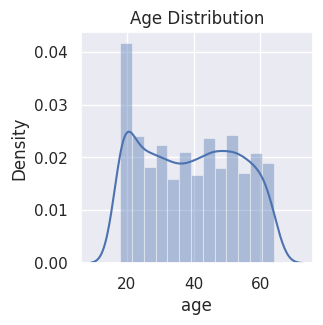

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(
    insurance_dataset['age'], kde = True,
    stat = "density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
plt.title('Age Distribution')
plt.show()

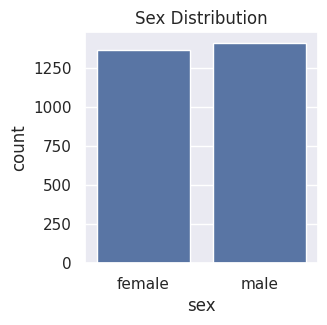

In [12]:
# Gender column
plt.figure(figsize=(3,3))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,1406
female,1366


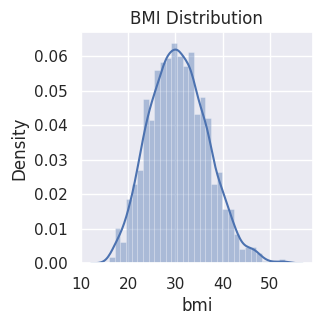

In [14]:
# bmi distribution
plt.figure(figsize=(3,3))
sns.histplot(
    insurance_dataset['bmi'], kde = True,
    stat = "density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 - 24.9

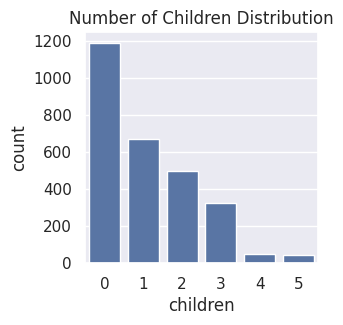

In [15]:
# children column
plt.figure(figsize=(3,3))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Number of Children Distribution')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


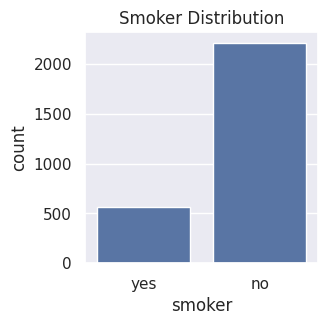

In [17]:
# smoker column
plt.figure(figsize = (3,3))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


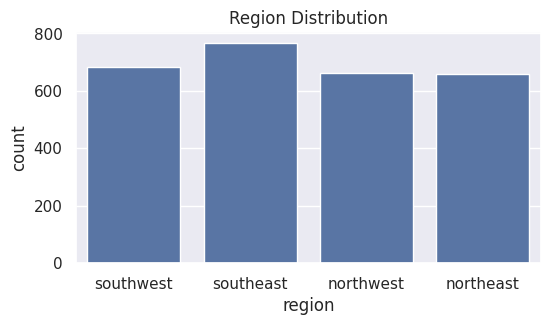

In [19]:
# region column
plt.figure(figsize = (6,3))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


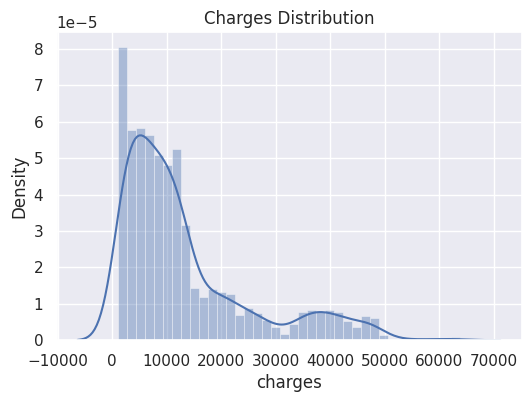

In [21]:
# distribution of charges value
plt.figure(figsize=(6,4))
sns.histplot(
    insurance_dataset['charges'], kde = True,
    stat = "density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
plt.title('Charges Distribution')
plt.show()

***Data Pre-Processing***

Encoding the categorical features

In [22]:
# encoding the sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace = True)

# encoding smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace = True)

# encoding the region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace = True)

insurance_dataset.head()

/tmp/ipython-input-3954202901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace = True)
/tmp/ipython-input-3954202901.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace = True)
/tmp/ipython-input-3954202901.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Exploratory Data Analysis

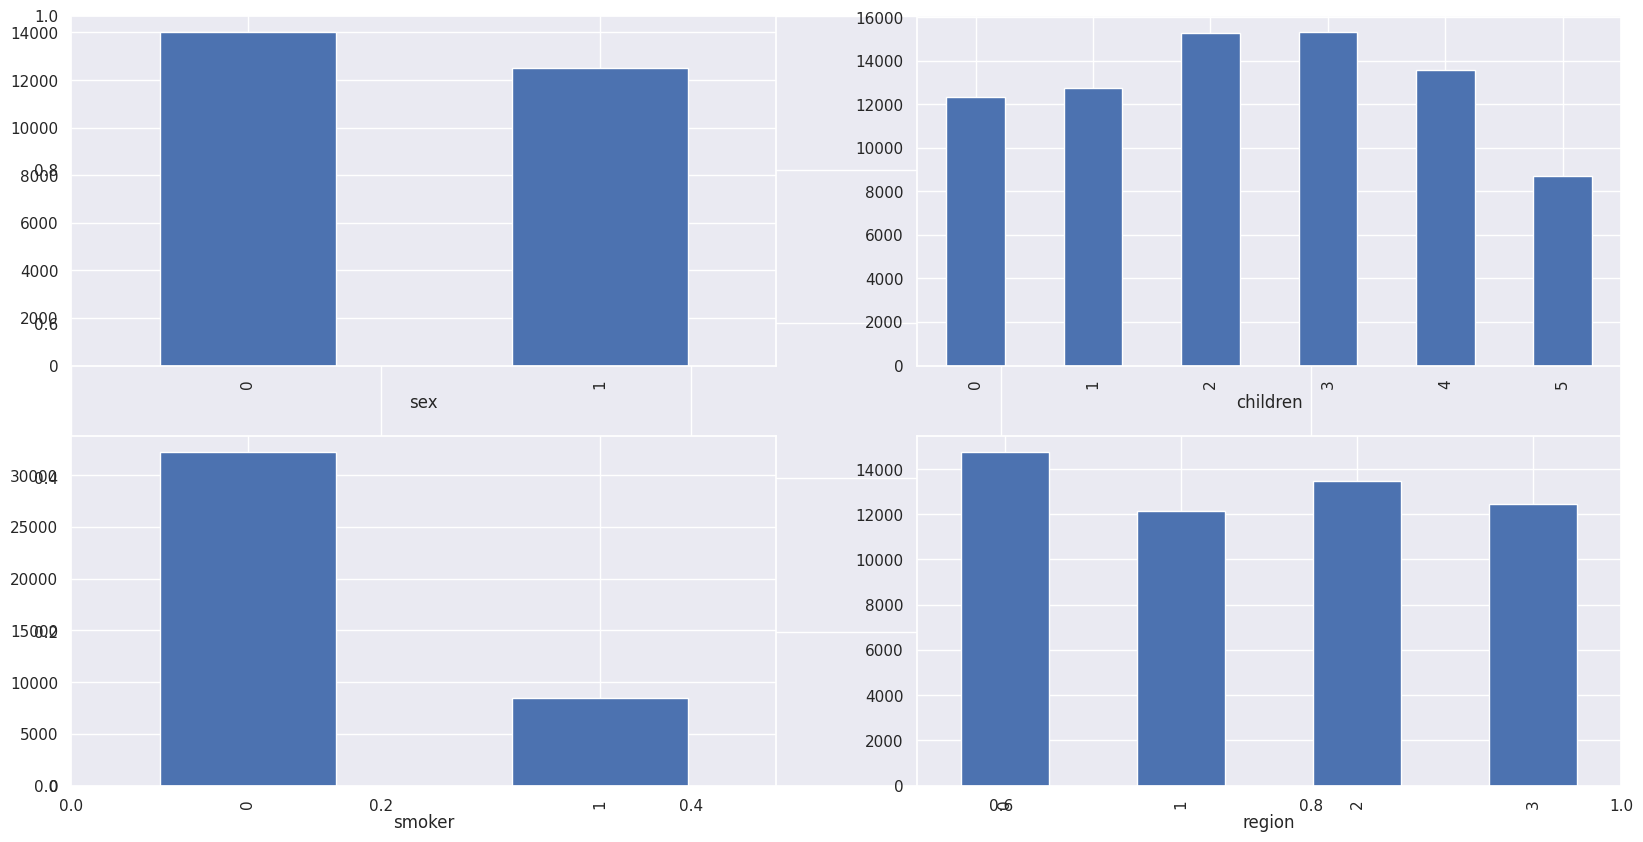

In [23]:
#for features: Sex, Children, Smoker, and Region
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    insurance_dataset.groupby(col).mean()['charges'].plot.bar()
plt.show()

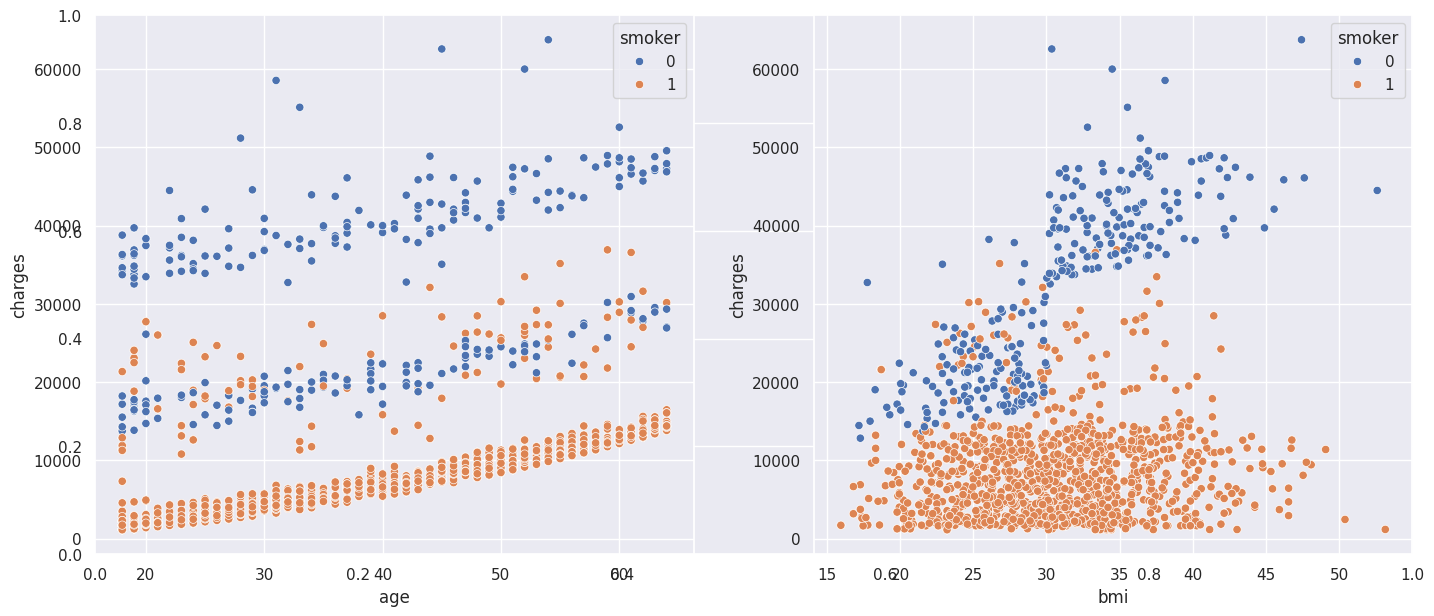

In [24]:
#for features: Age and BMI

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=insurance_dataset, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

Splitting the Feature and Target Variables

In [25]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [26]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


Splitting Data into Training & Testing

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2217, 6) (555, 6)


***Model Training***

Linear Regression

In [29]:
# loading the linear regression model
regressor = LinearRegression()

In [30]:
regressor.fit(X_train.values, Y_train.values)

LinearRegression()

***Model Evaluation***

In [31]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [32]:
# R^2 value (0-1)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value: ", r2_train)

R squared value:  0.7561940076387632


In [33]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [34]:
# R^2 value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7272408044903713


***Building a Predictive System***

In [35]:
input_data = (31, 1, 25.74, 0, 1, 0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The Insurance cost is USD ', prediction[0])
print()

[3466.43009475]
The Insurance cost is USD  3466.430094748601

